In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')
users = pd.read_csv('USER_TAKEHOME.csv')

## First: explore the data
Review the unstructured csv files and answer the following questions with code that supports your conclusions:
* Are there any data quality issues present?
* Are there any fields that are challenging to understand?   
We recommend using SQL or python and data visualization to examine the data.

### The Products Data

In [3]:
# Display the first 5 rows of the data to understand the structure
products.head(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


Category 1 - 4 are nested categories, organising products into a hierarchy of categories with Category_4 being the most specific subcategory. If the larger category does not have that many subcategories, than the values will be left NaN.

In [4]:
# understand the data types and missing values to prepare for data cleaning
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [6]:
# check for missing values
products.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [13]:
# check for duplicates
products.duplicated(subset='BARCODE').sum()

4209

In [29]:
products.duplicated().sum()

215

In [30]:
products['BARCODE'].duplicated().sum()

4209

In [15]:
products[products.duplicated(subset='BARCODE') & products['BARCODE'].notnull()]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
76394,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0
87568,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811.0
100470,Snacks,Candy,Confection Candy,NaN,"LIDL US, LLC",LIDL,20744731.0
151285,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3417607.0
181902,Snacks,Candy,Confection Candy,NaN,GRUPO NACIONAL DE CHOCOLATES SA,NUTRESA,75053055.0
...,...,...,...,...,...,...,...
827242,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3423905.0
834874,Snacks,Nuts & Seeds,Peanuts,NaN,NaN,NaN,3415207.0
838643,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3473108.0
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,404310.0


Assumption of the dataset:   
The 'Products' data set contains product metadata, including category, manufracter, brand, and a barcode, enabling further analysis in these areas.   
BARCODE is the primary key that identifies each unique product. With 4025 missing BARCODES, this cause problems in future product analysis.   
The 'BARCODE' column is incorrectly using scentific notation, and there are lots of null values in other columns.   
As previously assumed, the deeper the category is, the more missing values are as those products do not have that specific categroization.

In [28]:
# list all nested categories
products.groupby(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']).count()

MANUFACTURER  \
CATEGORY_1     CATEGORY_2         CATEGORY_3     CATEGORY_4                                           
Alcohol        Beer               Ale            Stout Ale                                        4   
                                  Lager          American Lager                                 116   
                                                 Imported Lager                                   5   
               Wine               Red Wine       Cabernet Sauvignon                              14   
                                                 Malbec                                           3   
...                                                                                             ...   
Restaurant     Beverages          Soda           Regular Soda                                     1   
Snacks         Puffed Snacks      Popcorn        Already Popped Popcorn                        4234   
                                                 Microwave Popcorn                             1929   
                                                 Popcorn Kernels & Popcorn Seasonings           361   
Sporting Goods Exercise & Fitness Yoga & Pilates Yoga & Pilates Mats                             13   

                                                                                       BRAND  \
CATEGORY_1     CATEGORY_2         CATEGORY_3     CATEGORY_4                                    
Alcohol        Beer               Ale            Stout Ale                                 4   
                                  Lager          American Lager                          116   
                                                 Imported Lager                            5   
               Wine               Red Wine       Cabernet Sauvignon                       14   
                                                 Malbec                                    3   
...                                                                                      ...   
Restaurant     Beverages          Soda           Regular Soda                              1   
Snacks         Puffed Snacks      Popcorn        Already Popped Popcorn                 4234   
                                                 Microwave Popcorn                      1929   
                                                 Popcorn Kernels & Popcorn Seasonings    361   
Sporting Goods Exercise & Fitness Yoga & Pilates Yoga & Pilates Mats                      13   

                                                                                       BARCODE  
CATEGORY_1     CATEGORY_2         CATEGORY_3     CATEGORY_4                                     
Alcohol        Beer               Ale            Stout Ale                                   4  
                                  Lager          American Lager                            114  
                                                 Imported Lager                              5  
               Wine               Red Wine       Cabernet Sauvignon                         13  
                                                 Malbec                                      2  
...                                                                                        ...  
Restaurant     Beverages          Soda           Regular Soda                                0  
Snacks         Puffed Snacks      Popcorn        Already Popped Popcorn                   6956  
                                                 Microwave Popcorn                        2308  
                                                 Popcorn Kernels & Popcorn Seasonings      712  
Sporting Goods Exercise & Fitness Yoga & Pilates Yoga & Pilates Mats                        13  

[127 rows x 3 columns]

^^ explaination of the table

In [4]:
# Data Cleaning
pd.set_option('display.float_format', lambda x: '%.0f' % x) # remove scientific notation
# case sensitivity
# how to deal with missing values?
# duplicated data?????

In [18]:
products.head(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459


In [57]:
# visualization
cat_count = products.groupby(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4'])['BARCODE'].count()
cat_count

CATEGORY_1      CATEGORY_2          CATEGORY_3      CATEGORY_4                          
Alcohol         Beer                Ale             Stout Ale                                  4
                                    Lager           American Lager                           114
                                                    Imported Lager                             5
                Wine                Red Wine        Cabernet Sauvignon                        13
                                                    Malbec                                     2
                                                                                            ... 
Restaurant      Beverages           Soda            Regular Soda                               0
Snacks          Puffed Snacks       Popcorn         Already Popped Popcorn                  6956
                                                    Microwave Popcorn                       2308
                                      

Text(0.5, 1.0, 'Distribution of Products in Each Category')

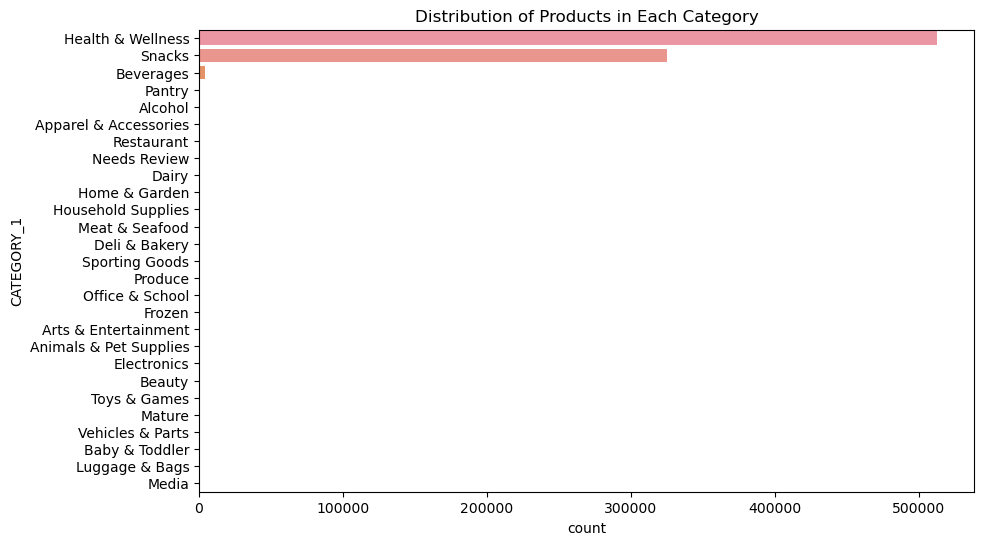

In [65]:
products['CATEGORY_1'].value_counts()
# visualize the distribution of products in each category
plt.figure(figsize=(10, 6))
sns.countplot(y='CATEGORY_1', data=products)
plt.title('Distribution of Products in Each Category')

Text(0.5, 1.0, 'Distribution of Products in the Health & Wellness Category')

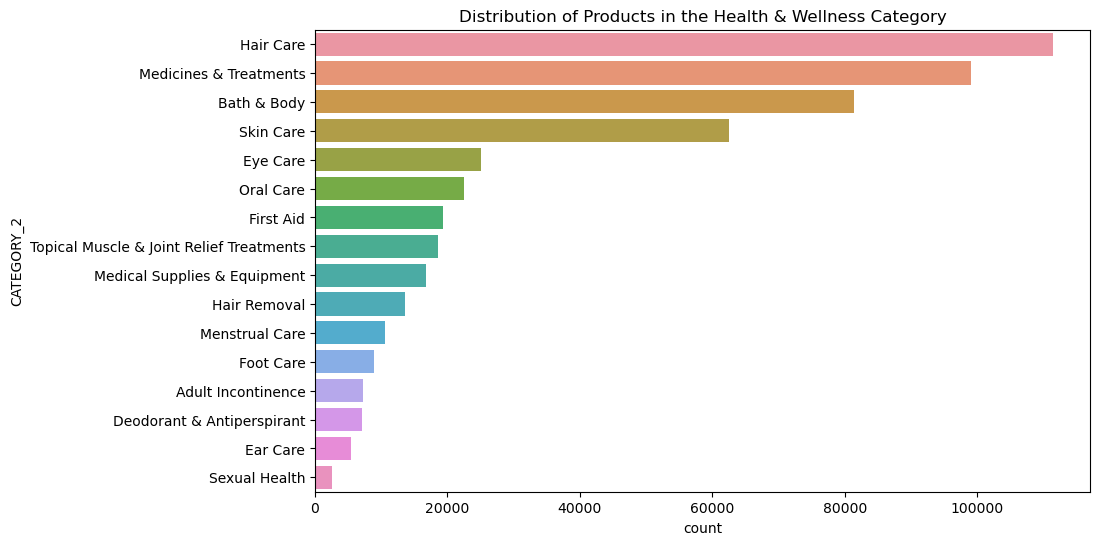

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(y='CATEGORY_2', data=products[products['CATEGORY_1'] == 'Health & Wellness'], order=products[products['CATEGORY_1'] == 'Health & Wellness']['CATEGORY_2'].value_counts().index)
plt.title('Distribution of Products in the Health & Wellness Category')

Text(0.5, 1.0, 'Distribution of Products in the Snacks Category')

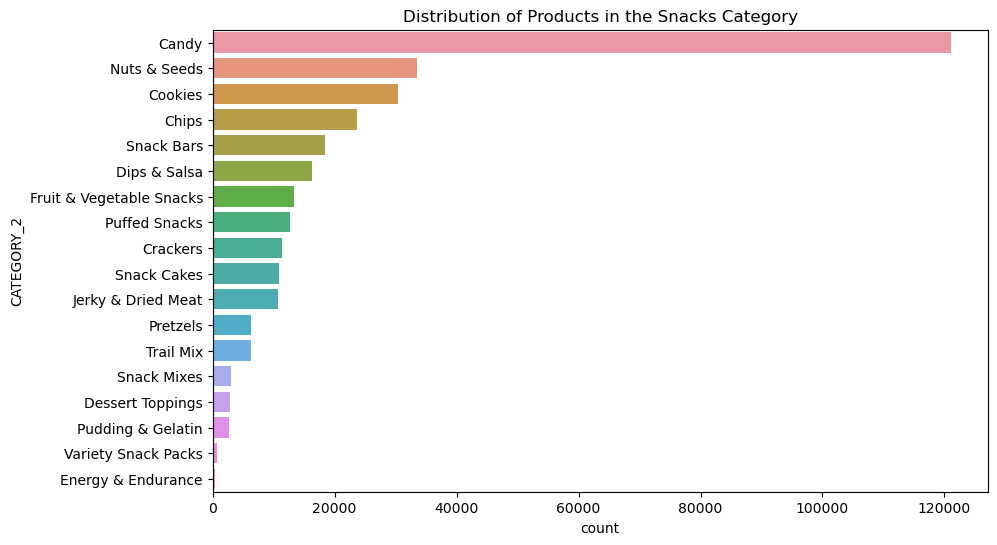

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(y='CATEGORY_2', data=products[products['CATEGORY_1'] == 'Snacks'], order=products[products['CATEGORY_1'] == 'Snacks']['CATEGORY_2'].value_counts().index)
plt.title('Distribution of Products in the Snacks Category')

<AxesSubplot:xlabel='count', ylabel='MANUFACTURER'>

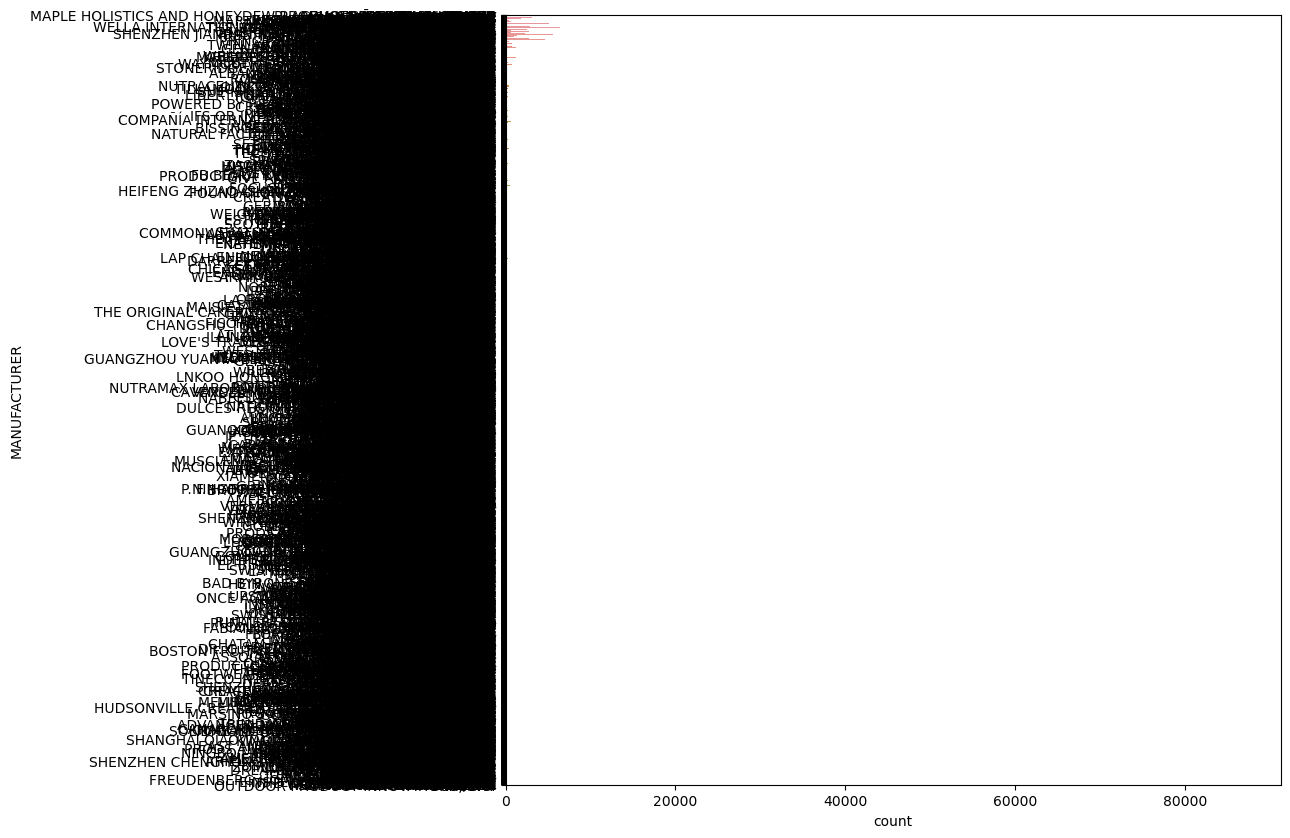

In [76]:
plt.figure(figsize=(10, 10))
sns.countplot(y='MANUFACTURER', data=products)
# what about NaN values?

<AxesSubplot:xlabel='count', ylabel='BRAND'>

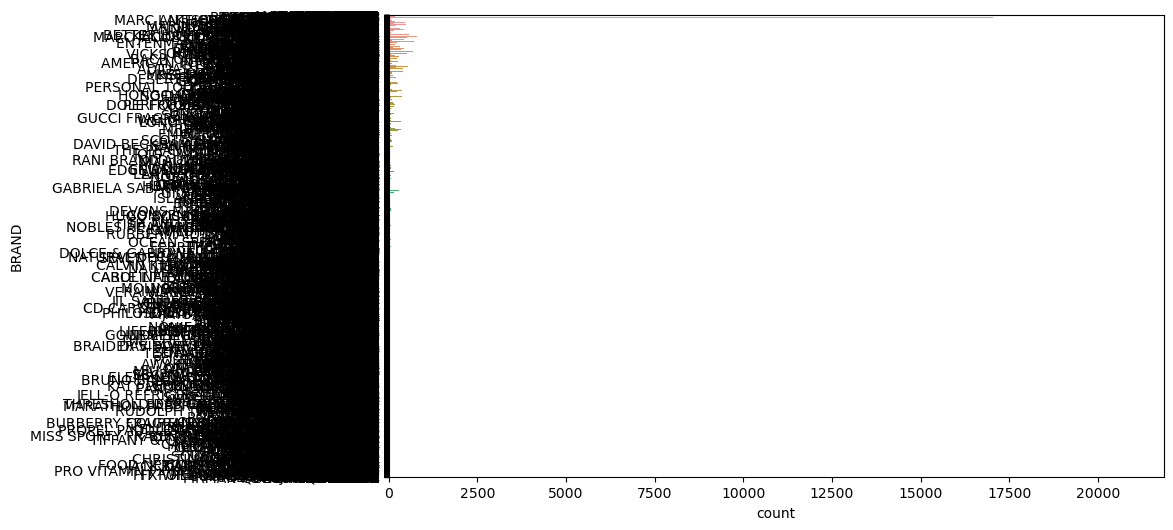

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(y='BRAND', data=products)
# what about NaN values?

Discover from the visualization

In [86]:
products['BRAND'].nunique()

8122

### The Users Data

In [19]:
# Display the first 5 rows of the data to understand the structure
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [20]:
# understand the data types and missing values to prepare for data cleaning
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [21]:
# check for missing values
users.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [22]:
# check for duplicates
users.duplicated().sum()

0

In [23]:
users.duplicated(subset='ID').sum()

0

In [24]:
users['LANGUAGE'].unique()

array(['es-419', 'en', nan], dtype=object)

In [25]:
users['GENDER'].unique()

array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

In [26]:
users['STATE'].unique()

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', nan, 'OH', 'TX', 'NM', 'PR',
       'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI', 'IA',
       'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI', 'IL', 'MS',
       'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV', 'AL', 'AK',
       'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'], dtype=object)

Assumption of the dataset:   
ID is the primary key   
CREATED_DATE and BIRTH_DATE need formatting, and since the column is called "date", so I assume that date is the only thing that matters, so I'll remove times and just keep year, month, and date   
STATE is using abbreviation, and I assume this data only contains users in the U.S.   
LANGUAGE hard to understand: es-419?   
'en' is using shortest ISO 639 code whereas es-419 (Spanish appropriate for the Latin America and Caribbean region) is using the UN M.49 region code. the shortest ISO 639 for Spanish is es.   
Gender: "prefer" and "Prefer", NaN   
no weird values in the STATE column

In [5]:
# data cleaning

# convert to date
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], format='%Y-%m-%d')
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], format='%Y-%m-%d')

# unify the language code
users['LANGUAGE'] = users['LANGUAGE'].replace('es-419', 'es')

# gender column: unify 'prefer_not_to_say' and 'Prefer not to say', 'non_binary' and 'Non-Binary', 'not_listed' and 'My gender isn't listed', and replace Nan with 'unknown'
gender_dict = {'Prefer not to say': 'prefer_not_to_say', 'Non-Binary': 'non_binary', "My gender isn't listed": 'not_listed', np.nan: 'unknown'}
# replace the values following the dictionary
users['GENDER'] = users['GENDER'].replace(gender_dict)

# duplicates???
# casesensitivity?
# missing values?

In [342]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   ID                     100000 non-null  object             
 1   CREATED_DATE           100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE             96325 non-null   datetime64[ns, UTC]
 3   STATE                  95188 non-null   object             
 4   LANGUAGE               69492 non-null   object             
 5   GENDER                 100000 non-null  object             
 6   AGE                    96325 non-null   float64            
 7   REGISTRATION_DURATION  100000 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [35]:
# check for the data after cleaning

In [130]:
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,CREATED_MONTH,CREATED_YEAR
0,5ef3b4f17053ab141787697d,2020-06-24,2000-08-11,CA,es,female,2020-06,2020
1,5ff220d383fcfc12622b96bc,2021-01-03,2001-09-24,PA,en,female,2021-01,2021
2,6477950aa55bb77a0e27ee10,2023-05-31,1994-10-28,FL,es,female,2023-05,2023
3,658a306e99b40f103b63ccf8,2023-12-26,NaT,NC,en,unknown,2023-12,2023
4,653cf5d6a225ea102b7ecdc2,2023-10-28,1972-03-19,PA,en,female,2023-10,2023


In [33]:
users['LANGUAGE'].unique()

array(['es', 'en', nan], dtype=object)

In [34]:
users['GENDER'].unique()

array(['female', 'unknown', 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'not_specified'], dtype=object)

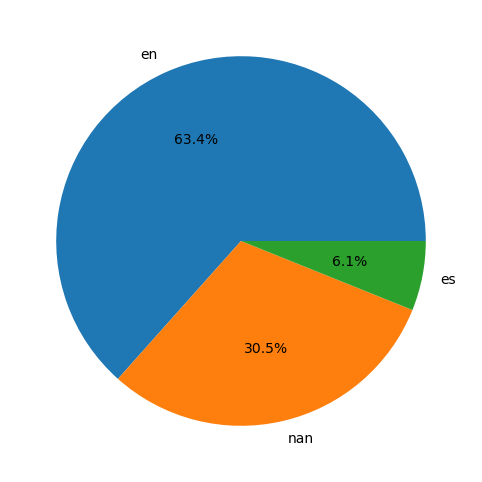

In [95]:
# visualization
plt.figure(figsize=(10, 6))
plt.pie(users['LANGUAGE'].value_counts(dropna=False), labels=users['LANGUAGE'].value_counts(dropna=False).index, autopct='%1.1f%%')
plt.show()

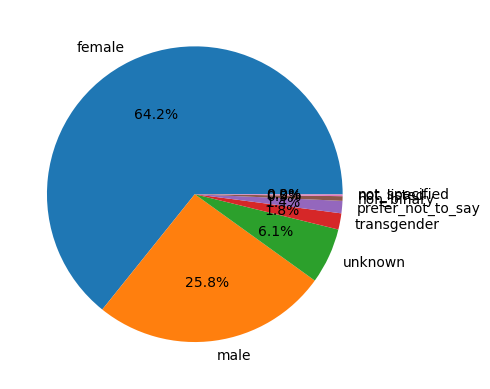

In [94]:
plt.pie(users['GENDER'].value_counts(dropna=False), labels=users['GENDER'].value_counts(dropna=False).index, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='count', ylabel='STATE'>

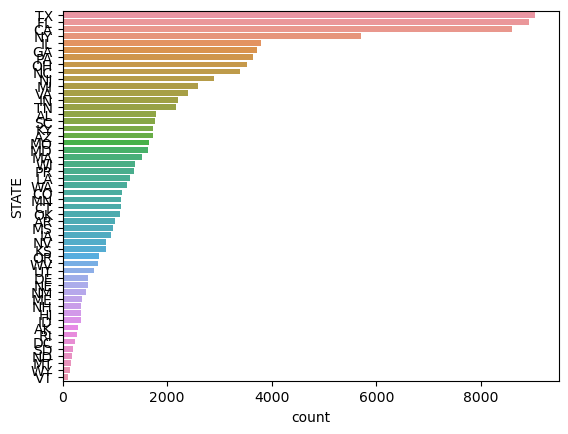

In [109]:
plt.plot(figsize=(100, 50))
sns.countplot(y='STATE', data=users, order=users['STATE'].value_counts().index)

In [187]:
users['CREATED_DATE'].isnull().sum()
# no missing values -> no need to handle missing values

0

In [6]:
# visualize the trend of user registration
# include only month
# color different lines with years
created_trend = users[['ID', 'CREATED_DATE']] # avoid changing the original data
created_trend['CREATED_YEAR'] = created_trend['CREATED_DATE'].dt.year
created_trend['CREATED_MONTH'] = created_trend['CREATED_DATE'].dt.month

created_trend

/var/folders/6j/4qtd6xcd2rv2b9gfpnc5nsg80000gn/T/ipykernel_81099/2073658878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  created_trend['CREATED_YEAR'] = created_trend['CREATED_DATE'].dt.year
/var/folders/6j/4qtd6xcd2rv2b9gfpnc5nsg80000gn/T/ipykernel_81099/2073658878.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  created_trend['CREATED_MONTH'] = created_trend['CREATED_DATE'].dt.month


,ID,CREATED_DATE,CREATED_YEAR,CREATED_MONTH
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2020,6
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2021,1
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,2023,5
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,2023,12
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,2023,10
...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12+00:00,2022,2
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39+00:00,2022,12
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05+00:00,2022,11
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04+00:00,2020,7


In [155]:
created_trend = created_trend.groupby(['CREATED_YEAR', 'CREATED_MONTH'])['ID'].count().reset_index()
created_trend


,CREATED_YEAR,CREATED_MONTH,ID
0,2014,4,2
1,2014,5,13
2,2014,7,4
3,2014,8,2
4,2014,9,3
...,...,...,...
120,2024,5,1146
121,2024,6,1260
122,2024,7,2037
123,2024,8,1807


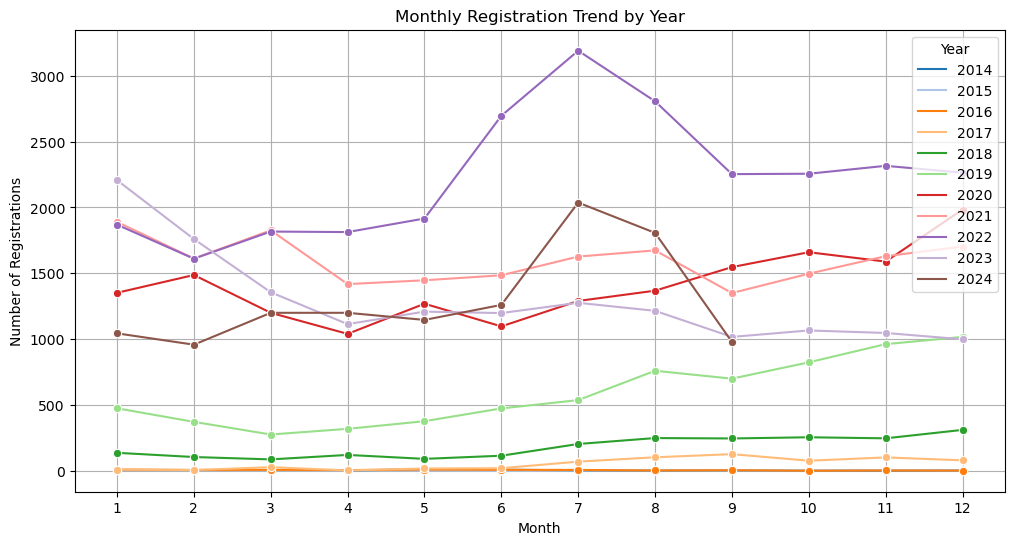

In [156]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='CREATED_MONTH', y='ID', hue='CREATED_YEAR', data=created_trend, marker='o', palette='tab20')
plt.title('Monthly Registration Trend by Year')
plt.xlabel('Month')
plt.ylabel('Number of Registrations')
plt.xticks(range(1, 13))  # Set x-ticks from 1 to 12 representing months
plt.legend(title='Year')
plt.grid(visible=True)
plt.show()

In [169]:
# birthday month
bd_month = users[['ID', 'BIRTH_DATE']]
bd_month['BD_MONTH'] = bd_month['BIRTH_DATE'].dt.month
# avoid issues with visualization
bd_month = bd_month.dropna(subset='BD_MONTH')
bd_month['BD_MONTH'] = bd_month['BD_MONTH'].astype(int)


/var/folders/6j/4qtd6xcd2rv2b9gfpnc5nsg80000gn/T/ipykernel_53843/76416449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_month['BD_MONTH'] = bd_month['BIRTH_DATE'].dt.month


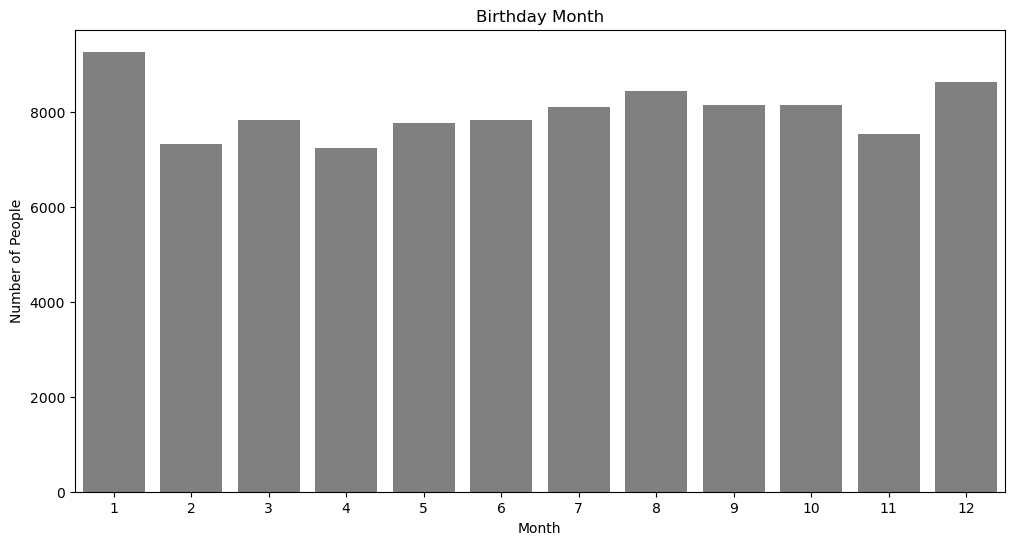

In [172]:
plt.figure(figsize=(12, 6))
sns.countplot(x='BD_MONTH', data=bd_month, color='gray')
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.title('Birthday Month')
plt.show()

In [7]:
# user age
users['AGE'] = (pd.to_datetime('today').tz_localize(None) - pd.to_datetime(users['BIRTH_DATE']).dt.tz_localize(None)).astype('<m8[Y]')
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es,female,24
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,23
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es,female,29
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,unknown,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,52


In [255]:
users['AGE'].describe()

count   96325
mean       40
std        15
min         2
25%        26
50%        38
75%        50
max       124
Name: AGE, dtype: float64

max 124???

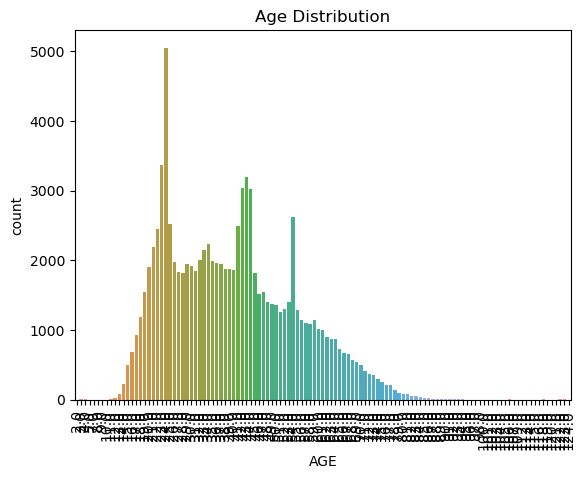

In [256]:
# visualize age distribution
plt.plot(figsize=(20, 15))
sns.countplot(x='AGE', data=users)
plt.title('Age Distribution')
plt.xticks(rotation=90)
plt.show()

In [8]:
# duration of registration
users['REGISTRATION_DURATION'] = (pd.to_datetime('today').tz_localize(None) - users['CREATED_DATE'].dt.tz_localize(None)).dt.days
# because months have varying lengths (e.g., February has 28 or 29 days, while other months have 30 or 31 days)
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,REGISTRATION_DURATION
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es,female,24,1568
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,23,1375
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es,female,29,497
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,unknown,NaN,288
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,52,347


In [287]:
users['REGISTRATION_DURATION'].describe()

count   100000
mean      1006
std        565
min         27
25%        618
50%        947
75%       1407
max       3826
Name: REGISTRATION_DURATION, dtype: float64

observation of the visualization

### The Transactions Data

In [36]:
transactions.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.00,


In [37]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [38]:
transactions.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

In [39]:
transactions.duplicated().sum()

171

In [40]:
transactions.duplicated(subset='RECEIPT_ID').sum()

25560

In [43]:
transactions['STORE_NAME'].sort_values().unique()

array(['/MART', '10BOX COST-PLUS', '1AINTING CUSVAL BISTRO',
       '4 WAY MEAT MARKET', '57 BAYARD STREET', '7-ELEVEN', '7TH HEAVEN',
       '99 CENTS ONLY STORES', 'A CME DURP SUPERAK', 'ACE HARDWARE',
       'ACME', 'ADAMS FAIRACRE FARMS', 'AG PIZZA', 'AL', "ALACURT'S",
       'ALAYO', 'ALAYOS', 'ALAYSOO', 'ALBERGUE OLIMPICO', 'ALBERTSONS',
       'ALCT', 'ALDI', "ALLSUP'S", 'ALOHA FROM BLIND VENDORS',
       'ALOME CINEMA GRILL', 'ALPINE MARKETPLACE', 'ALQI', 'ALTA',
       'AMAZON', 'AMAZONFRESH', 'AMERIMART', 'AMIGO', 'AMVETS POST 11',
       "ANAYA'S MARKET", 'ANAZEH SANDS BILLIARDS', 'ANDERSEN AFB',
       "ANDRONICO'S COMMUNITY MARKETS", "ANGELI'S CENTRAL MARKET",
       'ANPOCNMNA', 'APERMERCADOSS MRS PORQUE TU ARUS ESCOCININ',
       'APP LE MARKET', 'APPLES GROCERY STORE', 'AR DISNEY WORLD.',
       'ARIES SUPERMARKET', "ARMANDO'S SUPERMARKET", 'ARMITAGE PRODUCE',
       'ASHOPPERS', 'ASIA MARKET', 'ASIAN HARBOR', 'ASIAN MARKET',
       'ASSOCIATED SUPERMARKET', 'ASTAN FOOD

Assumption:   
* PURCHASE_DATE is using correct format
* SCAN_DATE need edited
* receipt format: 8 digits - 4 digits - 4 digits - 4 digits - 12 digits
* 連接key
* primary key: RECEIPT_ID?
* final quality: zero?
* final sale: unit??? my guess??
* purchase & scan?

In [9]:
# data cleaning
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'])
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], format='%Y-%m-%d %H:%M:%S')

In [181]:
# purchases with different purchase and scan dates
transactions[transactions['PURCHASE_DATE'] != transactions['SCAN_DATE'].dt.date]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,78742229751,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902000+00:00,TARGET,6144f4f1f3ef696919f54b5c,78300069942,zero,3.59
10,00177c13-f50e-4fbe-839e-47dbe20a39f0,2024-07-15,2024-07-16 09:51:06.183000+00:00,WALMART,61e962f64e54c329499f2df2,78742354941,1.00,
...,...,...,...,...,...,...,...,...
49990,441b9ecd-38ed-4960-9780-eb44a464284a,2024-06-26,2024-07-02 09:37:07.656000+00:00,FRY'S FOOD STORE,6251c788e3d6762c55855c1d,72250021081,1.00,2.49
49992,68f74fb3-ccf2-41f3-896a-799eb9a80680,2024-08-13,2024-08-19 11:06:59.023000+00:00,PEPPERIDGE FARM,64f4aee2b84ba41db3fb246a,14100071198,1.00,2.89
49993,f6d3e61d-488d-448b-8148-8d681e55b3d2,2024-09-01,2024-09-06 08:03:54.617000+00:00,TARGET,61056fcc1efef449f0f39f7c,85239042663,1.00,3.46
49994,6cdf3c1a-78b3-4fb0-85fd-52e2f5b4731c,2024-06-26,2024-07-01 11:00:39.769000+00:00,HARRIS TEETER,5de7ec93ca63cc17893cdd14,NaN,1.00,3.00


In [184]:
# scan date is later than purchase date?
transactions[transactions['PURCHASE_DATE'] > transactions['SCAN_DATE'].dt.date]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
51,008c1dcc-0f96-4b04-98c8-2a2bb63ef89d,2024-07-21,2024-07-20 19:54:23.133000+00:00,WALMART,5dc24cdb682fcf1229d04bd6,681131157339,zero,3.18
455,04a320ed-2903-45e5-8fd7-6eaf08daef32,2024-06-29,2024-06-28 11:03:31.783000+00:00,DOLLAR GENERAL STORE,62855f67708670299a658035,49000024685,zero,6.00
494,05023b3d-5f83-47a7-a17c-8e8521d0bc94,2024-09-08,2024-09-07 22:22:29.903000+00:00,SHOP RITE,666a43c77c0469953bfd9ae0,64144041640,2.00,
675,06ce3da3-a588-4c37-93b4-0b6d11e42704,2024-06-22,2024-06-21 12:34:15.665000+00:00,BIG LOTS,646f6ffb7a342372c858487e,311111706324,zero,4.05
870,08d0e78f-3e63-40a3-8eb0-73fdf76da52c,2024-06-22,2024-06-21 20:50:01.298000+00:00,DOLLAR GENERAL STORE,664cafb6e04f743a096a837e,76808280098,2.00,
...,...,...,...,...,...,...,...,...
46034,08d0e78f-3e63-40a3-8eb0-73fdf76da52c,2024-06-22,2024-06-21 20:50:01.298000+00:00,DOLLAR GENERAL STORE,664cafb6e04f743a096a837e,76808280098,2.00,3.50
46539,718aa730-b62f-4e18-8dba-1d7105dac341,2024-09-05,2024-09-04 20:14:00.374000+00:00,WALMART,5e0f561efa890112094202ad,73390009021,1.00,3.56
46941,af2b818f-4a92-4e98-958c-65f2ce0b271d,2024-06-15,2024-06-14 10:57:23.892000+00:00,DOLLAR GENERAL STORE,64de6465516348066e7c5690,817513015434,1.00,3.83
47653,72bb7b71-d958-4a46-ae62-43abdeb0e693,2024-06-15,2024-06-14 19:55:56.672000+00:00,WALMART,649726ea127ddb5d7f0004dc,34856108146,1.00,2.05


'''A transaction scan date is the date when a transaction is recorded in a database or on an original document, such as an invoice. It can also refer to the date a trade occurs for a financial instrument or security, which is when ownership officially transfers.'''

In [188]:
# check for missing values
transactions['SCAN_DATE'].isnull().sum()

0

In [185]:
# visualization
# should I use the scan date or purchase date?
transcations_trend = transactions[['RECEIPT_ID', 'SCAN_DATE']]
transcations_trend['YEAR'] = transcations_trend['SCAN_DATE'].dt.year
transcations_trend['MONTH'] = transcations_trend['SCAN_DATE'].dt.month

/var/folders/6j/4qtd6xcd2rv2b9gfpnc5nsg80000gn/T/ipykernel_53843/2196977382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcations_trend['YEAR'] = transcations_trend['SCAN_DATE'].dt.year
/var/folders/6j/4qtd6xcd2rv2b9gfpnc5nsg80000gn/T/ipykernel_53843/2196977382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcations_trend['MONTH'] = transcations_trend['SCAN_DATE'].dt.month


<AxesSubplot:xlabel='YEAR', ylabel='count'>

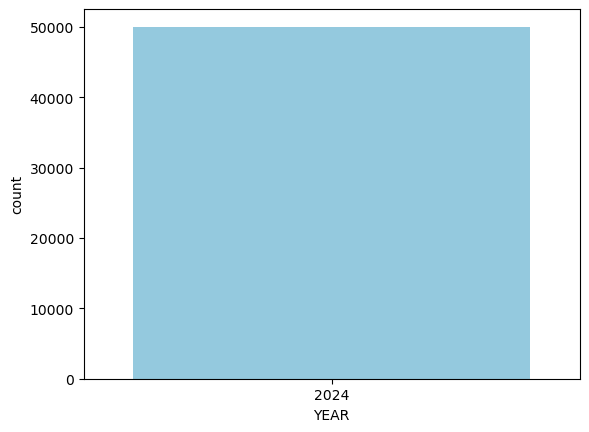

In [190]:
sns.countplot(x='YEAR', data=transcations_trend, color='skyblue')

<AxesSubplot:xlabel='MONTH', ylabel='count'>

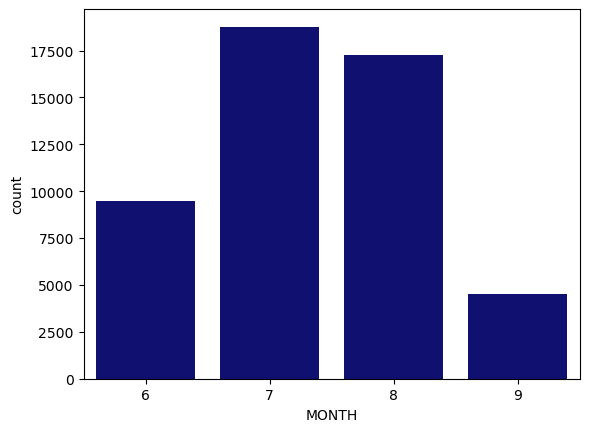

In [191]:
sns.countplot(x='MONTH', data=transcations_trend, color='navy')

In [199]:
transactions['SCAN_DATE'].sort_values()

41301   2024-06-12 06:36:34.910000+00:00
14027   2024-06-12 06:36:34.910000+00:00
44379   2024-06-12 07:46:27.560000+00:00
16113   2024-06-12 07:46:27.560000+00:00
40365   2024-06-12 08:14:27.453000+00:00
                      ...               
615     2024-09-08 22:34:18.203000+00:00
8706    2024-09-08 22:58:46.384000+00:00
31153   2024-09-08 22:58:46.384000+00:00
4805    2024-09-08 23:07:19.836000+00:00
37924   2024-09-08 23:07:19.836000+00:00
Name: SCAN_DATE, Length: 50000, dtype: datetime64[ns, UTC]

In [201]:
transactions.groupby('USER_ID')['RECEIPT_ID'].count().sort_values(ascending=False).head(10)

USER_ID
64e62de5ca929250373e6cf5    22
604278958fe03212b47e657b    20
62925c1be942f00613f7365e    20
64063c8880552327897186a5    18
6327a07aca87b39d76e03864    14
609af341659cf474018831fb    14
61d5f5d2c4525a3a478b386b    14
60a5363facc00d347abadc8e    14
624dca0770c07012cd5e6c03    14
61eb70d592b88c1007e68932    12
Name: RECEIPT_ID, dtype: int64

In [202]:
transactions['RECEIPT_ID'].nunique()

24440

In [203]:
transactions.shape
# multiple transactions in one receipt

(50000, 8)

In [204]:
transactions.groupby('RECEIPT_ID')['BARCODE'].count().sort_values(ascending=False).head(10)

RECEIPT_ID
bedac253-2256-461b-96af-267748e6cecf    12
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
61dc6179-7ae7-4acd-b043-8ba796bc5949     8
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
760c98da-5174-401f-a203-b839c4d406be     8
0fb89572-c817-47e2-bd11-6f467baacbb2     6
6e5ec1d0-e63f-4707-bd6e-78672ecd2a6c     6
de9f2ef7-2975-4cfd-a860-c06d89935e35     6
43955b35-6fbc-4909-a4de-1a0de0dc387f     6
Name: BARCODE, dtype: int64

In [205]:
transactions.groupby('RECEIPT_ID')['BARCODE'].count().mean()

1.8100654664484452

In [206]:
1.8100654664484452 * 2440
# missing bar codes

4416.559738134207

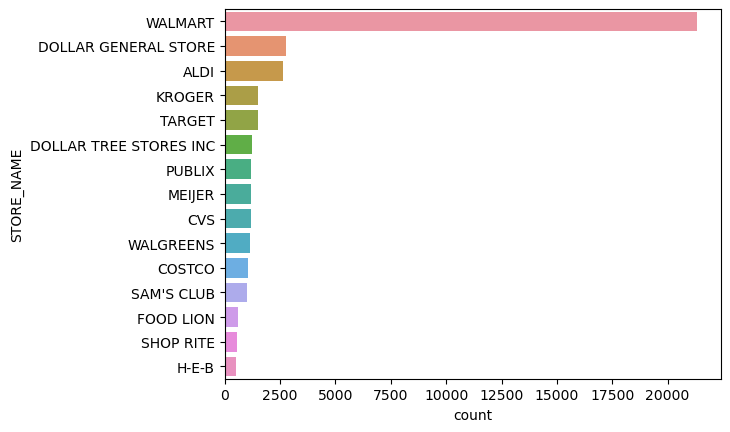

In [215]:
sns.countplot(y='STORE_NAME', data=transactions, order=transactions['STORE_NAME'].value_counts().head(15).index)
plt.show()

<AxesSubplot:xlabel='count', ylabel='USER_ID'>

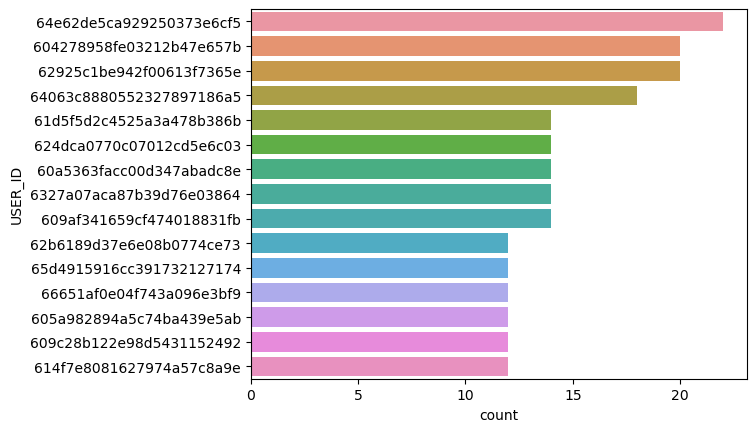

In [217]:
sns.countplot(y='USER_ID', data=transactions, order=transactions['USER_ID'].value_counts().head(15).index)

In [219]:
transactions['FINAL_QUANTITY'].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

In [222]:
transactions['FINAL_QUANTITY'].describe()

count     50000
unique       87
top        1.00
freq      35698
Name: FINAL_QUANTITY, dtype: object

In [220]:
transactions['FINAL_SALE'].unique()

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

In [223]:
transactions['FINAL_SALE'].describe()

count     50000
unique     1435
top            
freq      12500
Name: FINAL_SALE, dtype: object

^^ findings of the transcations data

### Summary of the Data Quality
* missing values （小分類ok but primary key will cause problems ）
* format (date time, scentific notation)
* duplicated data????
* how to handle missing values?
* inconsistent language code
* inconsistent datetime format
* zero/0?
* difference between transactions['PURCHASE_DATE'] and [SCAN_DATE]?
* inconsisent time frame between tables
* transctions? final sale? 小數點什麼意思

### JOIN DATA

In [10]:
from sqlalchemy import create_engine

# Create an in-memory SQLite database
engine = create_engine('sqlite://', echo=False)

In [11]:
# Load DataFrames into the SQLite database
products.to_sql('Products', con=engine, index=False, if_exists='replace')
transactions.to_sql('Transactions', con=engine, index=False, if_exists='replace')
users.to_sql('Users', con=engine, index=False, if_exists='replace')

100000

In [28]:
joint_query = '''
SELECT *
FROM transactions t
JOIN Products p
ON p.BARCODE = t.BARCODE
JOIN users u
ON u.ID = t.USER_ID
'''

joint_df = pd.read_sql(joint_query, con=engine)
joint_df.to_sql('JointData', con=engine, index=False, if_exists='replace')
joint_df.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,...,BRAND,BARCODE,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,REGISTRATION_DURATION
0,00729da3-2564-4616-a4ea-7426232d52e8,2024-08-30 00:00:00.000000,2024-09-03 13:00:21.972000,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,34000080113,1.00,,Snacks,Candy,...,HERSHEY'S,34000080113,62e5a95ca6565cf0534c989c,2022-07-30 21:57:48.000000,1961-07-21 00:00:00.000000,FL,en,female,63,802
1,00ad12b5-a990-4f56-b7d8-78a506c36529,2024-08-18 00:00:00.000000,2024-08-18 16:22:58.531000,7-ELEVEN,610a8541ca1fab5b417b5d33,40000001607,zero,2.39,Snacks,Candy,...,SKITTLES,40000001607,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05.000000,1977-01-12 00:00:00.000000,NY,en,male,47,1162
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19 00:00:00.000000,2024-08-19 11:19:59.681000,MEIJER,646bdaa67a342372c857b958,41250087700,zero,2.49,Snacks,Snack Cakes,...,MEIJER,41250087700,646bdaa67a342372c857b958,2023-05-22 21:12:06.000000,1981-03-23 00:00:00.000000,WI,en,female,43,506
3,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,2024-06-28 00:00:00.000000,2024-06-28 09:59:19.953000,PUBLIX,647281efa55bb77a0e26f586,72030000350,1.00,,Snacks,Snack Cakes,...,ENTENMANN'S SWEET BAKED GOODS,72030000350,647281efa55bb77a0e26f586,2023-05-27 22:19:27.000000,1960-06-13 00:00:00.000000,FL,en,male,64,501
4,04359032-f079-4fa3-b02d-0f97348b8f11,2024-08-29 00:00:00.000000,2024-08-30 17:33:49.374000,FAMILY DOLLAR,6528a0a388a3a884364d94dc,79200048563,zero,1.25,Snacks,Candy,...,NERDS CANDY,79200048563,6528a0a388a3a884364d94dc,2023-10-13 01:42:59.000000,1988-06-30 00:00:00.000000,WV,en,female,36,362


In [ ]:
# duplicate columns: USER_ID, ID, ......

In [15]:
joint_df.shape

(50024, 23)

In [360]:
products.shape

(845552, 7)

In [45]:
joint_df.isnull().sum()

RECEIPT_ID                 0
PURCHASE_DATE              0
SCAN_DATE                  0
STORE_NAME                 0
USER_ID                    0
BARCODE                    0
FINAL_QUANTITY             0
FINAL_SALE                 0
CATEGORY_1                 0
CATEGORY_2                 0
CATEGORY_3                12
CATEGORY_4               130
MANUFACTURER               6
BRAND                      6
BARCODE                    0
ID                         0
CREATED_DATE               0
BIRTH_DATE                 0
STATE                      0
LANGUAGE                   0
GENDER                     0
AGE                        0
REGISTRATION_DURATION      0
USER_GENERATION            0
dtype: int64

In [241]:
# data cleaning issues?

In [81]:
# check why so limited data after joining
products['BARCODE'].isna().sum()

4025

In [82]:
users['ID'].isna().sum()

0

In [83]:
transactions['BARCODE'].isna().sum()

5762

In [84]:
transactions['USER_ID'].isna().sum()

0

In [87]:
pd.read_sql('SELECT * FROM transactions t JOIN users u ON u.ID = t.USER_ID', con=engine)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,REGISTRATION_DURATION
0,00729da3-2564-4616-a4ea-7426232d52e8,2024-08-30 00:00:00.000000,2024-09-03 13:00:21.972000,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,34000080113,1.00,,62e5a95ca6565cf0534c989c,2022-07-30 21:57:48.000000,1961-07-21 00:00:00.000000,FL,en,female,63,802
1,00ad12b5-a990-4f56-b7d8-78a506c36529,2024-08-18 00:00:00.000000,2024-08-18 16:22:58.531000,7-ELEVEN,610a8541ca1fab5b417b5d33,40000001607,zero,2.39,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05.000000,1977-01-12 00:00:00.000000,NY,en,male,47,1162
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19 00:00:00.000000,2024-08-19 11:19:59.681000,MEIJER,646bdaa67a342372c857b958,41250087700,zero,2.49,646bdaa67a342372c857b958,2023-05-22 21:12:06.000000,1981-03-23 00:00:00.000000,WI,en,female,43,506
3,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19 00:00:00.000000,2024-08-19 11:19:59.681000,MEIJER,646bdaa67a342372c857b958,41250216056,1.00,,646bdaa67a342372c857b958,2023-05-22 21:12:06.000000,1981-03-23 00:00:00.000000,WI,en,female,43,506
4,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,2024-06-28 00:00:00.000000,2024-06-28 09:59:19.953000,PUBLIX,647281efa55bb77a0e26f586,72030000350,1.00,,647281efa55bb77a0e26f586,2023-05-27 22:19:27.000000,1960-06-13 00:00:00.000000,FL,en,male,64,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,d80f7f61-d98f-46d7-be8a-0969971e2b7c,2024-08-16 00:00:00.000000,2024-08-17 08:55:14.932000,HY-VEE,5e6d0beb01ecdd13986852e8,30772112526,1.00,8.97,5e6d0beb01ecdd13986852e8,2020-03-14 16:53:00.000000,1960-05-12 00:00:00.000000,IA,en,male,64,1670
258,c50b8ee7-9e03-4f7c-9af1-73e367dbf2bb,2024-08-13 00:00:00.000000,2024-08-13 13:37:15.212000,ALDI,64dd9170516348066e7c4006,NaN,1.00,1.29,64dd9170516348066e7c4006,2023-08-17 03:18:08.000000,1993-12-11 04:18:09.000000,SC,en,female,30,419
259,47c724c5-680f-450d-a617-e36514fff06e,2024-07-18 00:00:00.000000,2024-07-19 18:36:31.512000,H-E-B,64ce5d823cb069b5eac9b700,41220078400,1.00,2.97,64ce5d823cb069b5eac9b700,2023-08-05 14:32:34.000000,1957-04-02 15:32:36.000000,TX,en,male,67,431
260,fb6dfcb8-65a0-4024-9b4a-5091d0af3c72,2024-07-14 00:00:00.000000,2024-07-14 21:11:46.253000,LOTTE PLAZA MARKET,5fbd58f1ad6b5e12a114079a,25407803603,1.00,1.79,5fbd58f1ad6b5e12a114079a,2020-11-24 19:03:13.000000,1962-04-06 00:00:00.000000,VA,en,male,62,1415


In [90]:
t1 = pd.read_sql('SELECT * FROM transactions t JOIN Products p ON p.BARCODE = t.BARCODE', con=engine)
print(t1.shape)
print(len(t1['USER_ID'].unique()))

(24854, 15)
10226


## Second: provide queries
Answer three of the following questions with at least one question coming from the closed-ended and one from the open-ended question set. Each question should be answered using one query.
* Closed-ended questions:
1. What are the top 5 brands by receipts scanned among users 21 and over?
2. What are the top 5 brands by sales among users that have had their account for at least six months?
3. What is the percentage of sales in the Health & Wellness category by generation?
   
* Open-ended questions: for these, make assumptions and clearly state them when answering the question.
1. Who are Fetch’s power users?
2. Which is the leading brand in the Dips & Salsa category?
3. At what percent has Fetch grown year over year?

In [272]:
# top 5 brands by receipts scanned among users 21 and over
# assumption: top brands as in the most scanned brands

q1_query = '''
SELECT BRAND, COUNT(RECEIPT_ID) AS COUNT
FROM JOINT_DATA
WHERE AGE >= 21
GROUP BY BRAND
ORDER BY COUNT DESC
LIMIT 10
'''

q1_df = pd.read_sql(q1_query, con=engine)
q1_df

,BRAND,COUNT
0,NERDS CANDY,6
1,DOVE,6
2,None,6
3,TRIDENT,4
4,SOUR PATCH KIDS,4
5,MEIJER,4
6,HERSHEY'S,4
7,GREAT VALUE,4
8,COCA-COLA,4
9,UTZ,2


In [291]:
# top 5 brands by sales among users that have had their account for at least 6 months
# assumption: top brands as in the most sales
# assumption: 6 months = 180 days
q2_query = '''
SELECT BRAND, COUNT(RECEIPT_ID) AS SALES
FROM JOINT_DATA
WHERE REGISTRATION_DURATION >= 180
GROUP BY BRAND
ORDER BY SALES DESC
LIMIT 10
'''

q2_df = pd.read_sql(q2_query, con=engine)
q2_df

,BRAND,SALES
0,NERDS CANDY,6
1,DOVE,6
2,None,6
3,TRIDENT,4
4,SOUR PATCH KIDS,4
5,MEIJER,4
6,GREAT VALUE,4
7,COCA-COLA,4
8,UTZ,2
9,TWIX,2


In [33]:
# percentage of sales in the Health & Wellness category by generation
# assumption: generation is based on age
# assumption: Health & Wellness category is based on CATEGORY_1

# generation: 
# Generation Alpha (born 2013-2025),
# Gen Z (born 1997-2012), 
# Millennials (born 1981-1996), 
# Gen X (born 1965-1980), 
# Baby Boomers (born 1946-1964), 
# Silent Generation (born 1925-1945)
# The Greatest Generation (born 1901-1924)
# reference: https://libguides.usc.edu/busdem/age

# get_generation_query = '''
# SELECT CASE 
#         WHEN strftime("%Y", BIRTH_DATE) BETWEEN 1997 AND 2012 THEN 'Gen Z'
#         WHEN strftime("%Y", BIRTH_DATE) BETWEEN 1981 AND 1996 THEN 'Millennials'
#         WHEN strftime("%Y", BIRTH_DATE) BETWEEN 1965 AND 1980 THEN 'Gen X'
#         WHEN strftime("%Y", BIRTH_DATE) BETWEEN 1946 AND 1964 THEN 'Baby Boomers'
#         WHEN strftime("%Y", BIRTH_DATE) BETWEEN 1925 AND 1945 THEN 'Silent Generation'
#         WHEN strftime("%Y", BIRTH_DATE) BETWEEN 1901 AND 1924 THEN 'The Greatest Generation'
#         ELSE 'Other'
#     END AS GENERATION,
#     (COUNT(RECEIPT_ID)/(SELECT COUNT(*) FROM JointData WHERE CATEGORY_1 = 'Health & Wellness')) AS PERCENTAGE
# FROM JointData
# WHERE CATEGORY_1 = 'Health & Wellness'
# GROUP BY GENERATION;
# '''

# get_generation_query = '''
# WITH GenerationSales AS (
#     SELECT CASE 
#             WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1997 AND 2012 THEN 'Gen Z'
#             WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1981 AND 1996 THEN 'Millennials'
#             WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1965 AND 1980 THEN 'Gen X'
#             WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1946 AND 1964 THEN 'Baby Boomers'
#             WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1925 AND 1945 THEN 'Silent Generation'
#             WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1901 AND 1924 THEN 'The Greatest Generation'
#             ELSE 'Other'
#         END AS GENERATION,
#         COUNT(RECEIPT_ID) AS SALES_COUNT
#     FROM JointData
#     WHERE CATEGORY_1 = 'Health & Wellness' AND BIRTH_DATE IS NOT NULL
#     GROUP BY GENERATION
# ), TotalSales AS (
#     SELECT COUNT(RECEIPT_ID) AS TOTAL_COUNT
#     FROM JointData
#     WHERE CATEGORY_1 = 'Health & Wellness'
# )
# SELECT gs.GENERATION,
#        ROUND((gs.SALES_COUNT * 1.0 / ts.TOTAL_COUNT) * 100, 2) AS PERCENTAGE
# FROM GenerationSales gs, TotalSales ts
# WHERE gs.GENERATION IS NOT NULL
# ORDER BY PERCENTAGE DESC;
# '''

# q3_df = pd.read_sql(get_generation_query, con=engine)
# q3_df

# Convert the BIRTH_DATE column to datetime after reading from SQL
joint_df['BIRTH_DATE'] = pd.to_datetime(joint_df['BIRTH_DATE'], format='%Y-%m-%d')
joint_df['USER_GENERATION'] = pd.cut(joint_df['BIRTH_DATE'].dt.year, bins=[1900, 1924, 1945, 1964, 1980, 1996, 2012, 2015], labels=['The Greatest Generation', 'Silent Generation', 'Baby Boomers', 'Gen X', 'Millennials', 'Gen Z', 'Generation Alpha'])
joint_df.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,...,BARCODE,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,REGISTRATION_DURATION,USER_GENERATION
0,00729da3-2564-4616-a4ea-7426232d52e8,2024-08-30 00:00:00.000000,2024-09-03 13:00:21.972000,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,34000080113,1.00,,Snacks,Candy,...,34000080113,62e5a95ca6565cf0534c989c,2022-07-30 21:57:48.000000,1961-07-21,FL,en,female,63,802,Baby Boomers
1,00ad12b5-a990-4f56-b7d8-78a506c36529,2024-08-18 00:00:00.000000,2024-08-18 16:22:58.531000,7-ELEVEN,610a8541ca1fab5b417b5d33,40000001607,zero,2.39,Snacks,Candy,...,40000001607,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05.000000,1977-01-12,NY,en,male,47,1162,Gen X
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19 00:00:00.000000,2024-08-19 11:19:59.681000,MEIJER,646bdaa67a342372c857b958,41250087700,zero,2.49,Snacks,Snack Cakes,...,41250087700,646bdaa67a342372c857b958,2023-05-22 21:12:06.000000,1981-03-23,WI,en,female,43,506,Millennials
3,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,2024-06-28 00:00:00.000000,2024-06-28 09:59:19.953000,PUBLIX,647281efa55bb77a0e26f586,72030000350,1.00,,Snacks,Snack Cakes,...,72030000350,647281efa55bb77a0e26f586,2023-05-27 22:19:27.000000,1960-06-13,FL,en,male,64,501,Baby Boomers
4,04359032-f079-4fa3-b02d-0f97348b8f11,2024-08-29 00:00:00.000000,2024-08-30 17:33:49.374000,FAMILY DOLLAR,6528a0a388a3a884364d94dc,79200048563,zero,1.25,Snacks,Candy,...,79200048563,6528a0a388a3a884364d94dc,2023-10-13 01:42:59.000000,1988-06-30,WV,en,female,36,362,Millennials


In [302]:
users['BIRTH_DATE'].dt.year.describe()
# check minimun and max to ensure no need to handle outliers

count   96325
mean     1984
std        15
min      1900
25%      1974
50%      1985
75%      1998
max      2022
Name: BIRTH_DATE, dtype: float64

In [55]:
q3_df = joint_df[joint_df['CATEGORY_1'] == 'Health & Wellness'].groupby('USER_GENERATION')['RECEIPT_ID'].count().reset_index()
q3_df['PERCENTAGE'] = q3_df['RECEIPT_ID'] / q3_df['RECEIPT_ID'].sum() * 100
q3_df

,USER_GENERATION,RECEIPT_ID,PERCENTAGE
0,The Greatest Generation,0,0
1,Silent Generation,0,0
2,Baby Boomers,10,29
3,Gen X,14,41
4,Millennials,10,29
5,Gen Z,0,0
6,Generation Alpha,0,0


 compare to the real-world scenario   
https://www.numerator.com/generations-hub/#:~:text=Adult%20Gen%20Z%20and%20Millennial,2019%20to%204.7%25%20in%202023.

In [59]:
# who are Fetch's power users
# assumption1: power users are those who have the most receipts scanned
as1_query = '''
SELECT USER_ID, STATE, LANGUAGE, GENDER, AGE, COUNT(RECEIPT_ID) AS RECEIPT_COUNT
FROM JointData
GROUP BY USER_ID
ORDER BY RECEIPT_COUNT DESC
LIMIT 10
'''

as1_df = pd.read_sql(as1_query, con=engine)
as1_df

,USER_ID,STATE,LANGUAGE,GENDER,AGE,RECEIPT_COUNT
0,6528a0a388a3a884364d94dc,WV,en,female,36,6
1,6661ed1e7c0469953bfc76c4,FL,en,female,33,4
2,65044dc5fe41d365c2ed7d71,IL,en,female,59,4
3,646bdaa67a342372c857b958,WI,en,female,43,4
4,63c8294d39c79dcbdd5c1e4f,SC,en,female,55,4
5,62ffec490d9dbaff18c0a999,NY,en,female,72,4
6,62c09104baa38d1a1f6c260e,PA,en,female,46,4
7,61fd8c73ac4e5e6b50b4ca01,IL,en,female,43,4
8,610a8541ca1fab5b417b5d33,NY,en,male,47,4
9,5ca54049adfcb4140b54e1bf,NC,en,female,34,4


In [61]:
# assumption2: power users are those who have the most sales
as2_query = '''
SELECT USER_ID, STATE, LANGUAGE, GENDER, AGE, SUM(FINAL_SALE) AS TOTAL_SALES
FROM JointData
GROUP BY USER_ID
ORDER BY TOTAL_SALES DESC
LIMIT 10
'''

as2_df = pd.read_sql(as2_query, con=engine)
as2_df

,USER_ID,STATE,LANGUAGE,GENDER,AGE,TOTAL_SALES
0,643059f0838dd2651fb27f50,PA,en,male,70,72
1,62ffec490d9dbaff18c0a999,NY,en,female,72,47
2,5d191765c8b1ba28e74e8463,TX,en,female,60,35
3,64dd9170516348066e7c4006,SC,en,female,30,24
4,6661ed1e7c0469953bfc76c4,FL,en,female,33,19
5,5b441360be53340f289b0795,IL,en,female,42,18
6,5fd4fb485f410d44bae3a776,CA,es,female,45,15
7,6615dab878ee6750bbc350ea,VA,en,female,40,14
8,6528a0a388a3a884364d94dc,WV,en,female,36,12
9,5f9414c65896841696c17359,FL,en,male,52,12


In [62]:
# assumption3: power users are those who have the most items purchased
as3_query = '''
SELECT USER_ID, STATE, LANGUAGE, GENDER, AGE, SUM(FINAL_QUANTITY) AS TOTAL_ITEMS
FROM JointData
GROUP BY USER_ID
ORDER BY TOTAL_ITEMS DESC
LIMIT 10
'''

as3_df = pd.read_sql(as3_query, con=engine)
as3_df

,USER_ID,STATE,LANGUAGE,GENDER,AGE,TOTAL_ITEMS
0,61fd8c73ac4e5e6b50b4ca01,IL,en,female,43,4
1,5fd4fb485f410d44bae3a776,CA,es,female,45,4
2,5ca54049adfcb4140b54e1bf,NC,en,female,34,4
3,6661ed1e7c0469953bfc76c4,FL,en,female,33,3
4,6528a0a388a3a884364d94dc,WV,en,female,36,3
5,65044dc5fe41d365c2ed7d71,IL,en,female,59,3
6,646bdaa67a342372c857b958,WI,en,female,43,3
7,63c8294d39c79dcbdd5c1e4f,SC,en,female,55,3
8,62c09104baa38d1a1f6c260e,PA,en,female,46,3
9,610a8541ca1fab5b417b5d33,NY,en,male,47,3


In [63]:
# overlap between the three assumptions
as1_df.merge(as2_df, on='USER_ID').merge(as3_df, on='USER_ID')

,USER_ID,STATE_x,LANGUAGE_x,GENDER_x,AGE_x,RECEIPT_COUNT,STATE_y,LANGUAGE_y,GENDER_y,AGE_y,TOTAL_SALES,STATE,LANGUAGE,GENDER,AGE,TOTAL_ITEMS
0,6528a0a388a3a884364d94dc,WV,en,female,36,6,WV,en,female,36,12,WV,en,female,36,3
1,6661ed1e7c0469953bfc76c4,FL,en,female,33,4,FL,en,female,33,19,FL,en,female,33,3


In [65]:
# leading brand in the Dips & Salsa category

# find the category
for cat in ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']:
    if 'Dips & Salsa' in products[cat].unique():
        print(cat)
        break

CATEGORY_2


In [70]:
# assumption1: leading brand as in the most scanned brand
q2_as1_query = '''
SELECT BRAND, COUNT(RECEIPT_ID) AS COUNT
FROM JointData
WHERE CATEGORY_2 = 'Dips & Salsa'
GROUP BY BRAND
ORDER BY COUNT DESC
'''

q2_as1_df = pd.read_sql(q2_as1_query, con=engine)
q2_as1_df

,BRAND,COUNT
0,MARZETTI,2
1,MARKETSIDE,2
2,HIDDEN VALLEY,2
3,DEAN'S DAIRY DIP,2
4,DEAN'S DAIRY,2


In [73]:
# assumption2: leading brand as in the most sales
q2_as2_query = '''
SELECT BRAND, SUM(FINAL_SALE) AS TOTAL_SALES
FROM JointData
WHERE CATEGORY_2 = 'Dips & Salsa'
GROUP BY BRAND
ORDER BY TOTAL_SALES DESC
'''

q2_as2_df = pd.read_sql(q2_as2_query, con=engine)
q2_as2_df

,BRAND,TOTAL_SALES
0,MARZETTI,6
1,DEAN'S DAIRY,4
2,HIDDEN VALLEY,4
3,MARKETSIDE,3
4,DEAN'S DAIRY DIP,2


In [74]:
# assumption3: leading brand as in the most items purchased
q2_as3_query = '''
SELECT BRAND, SUM(FINAL_QUANTITY) AS TOTAL_ITEMS
FROM JointData
WHERE CATEGORY_2 = 'Dips & Salsa'
GROUP BY BRAND
ORDER BY TOTAL_ITEMS DESC
'''

q2_as3_df = pd.read_sql(q2_as3_query, con=engine)
q2_as3_df

,BRAND,TOTAL_ITEMS
0,MARZETTI,2
1,MARKETSIDE,2
2,DEAN'S DAIRY DIP,2
3,DEAN'S DAIRY,2
4,HIDDEN VALLEY,1


In [75]:
# assumption4: leading brand as in the most unique users
q2_as4_query = '''
SELECT BRAND, COUNT(DISTINCT USER_ID) AS UNIQUE_USERS
FROM JointData
WHERE CATEGORY_2 = 'Dips & Salsa'
GROUP BY BRAND
ORDER BY UNIQUE_USERS DESC
'''

q2_as4_df = pd.read_sql(q2_as4_query, con=engine)
q2_as4_df

,BRAND,UNIQUE_USERS
0,MARZETTI,1
1,MARKETSIDE,1
2,HIDDEN VALLEY,1
3,DEAN'S DAIRY DIP,1
4,DEAN'S DAIRY,1


In [77]:
# overlap between the four assumptions
q2_as1_df.merge(q2_as2_df, on='BRAND').merge(q2_as3_df, on='BRAND').merge(q2_as4_df, on='BRAND')

,BRAND,COUNT,TOTAL_SALES,TOTAL_ITEMS,UNIQUE_USERS
0,MARZETTI,2,6,2,1
1,MARKETSIDE,2,3,2,1
2,HIDDEN VALLEY,2,4,1,1
3,DEAN'S DAIRY DIP,2,2,2,1
4,DEAN'S DAIRY,2,4,2,1


In [78]:
# at what percent has Fetch grown year over year?
# assumption1: growth is based on the number of users
q3_as1_query = '''
WITH UserGrowth AS (
    SELECT strftime('%Y', CREATED_DATE) AS YEAR, COUNT(ID) AS USER_COUNT
    FROM Users
    GROUP BY YEAR
)
SELECT ug1.YEAR, ug1.USER_COUNT AS CURRENT_USERS, ug2.USER_COUNT AS PREVIOUS_USERS,
         ROUND((ug1.USER_COUNT - ug2.USER_COUNT) * 1.0 / ug2.USER_COUNT * 100, 2) AS GROWTH_PERCENT
FROM UserGrowth ug1
JOIN UserGrowth ug2
ON CAST(ug1.YEAR AS INTEGER) = CAST(ug2.YEAR AS INTEGER) + 1
'''

q3_as1_df = pd.read_sql(q3_as1_query
                        , con=engine)
q3_as1_df

,YEAR,CURRENT_USERS,PREVIOUS_USERS,GROWTH_PERCENT
0,2015,51,30,70
1,2016,70,51,37
2,2017,644,70,820
3,2018,2168,644,237
4,2019,7093,2168,227
5,2020,16883,7093,138
6,2021,19159,16883,13
7,2022,26807,19159,40
8,2023,15464,26807,-42
9,2024,11631,15464,-25


In [79]:
# assumption2: growth is based on the number of transactions
q3_as2_query = '''
WITH TransactionGrowth AS (
    SELECT strftime('%Y', PURCHASE_DATE) AS YEAR, COUNT(RECEIPT_ID) AS TRANSACTION_COUNT
    FROM Transactions
    GROUP BY YEAR
)
SELECT tg1.YEAR, tg1.TRANSACTION_COUNT AS CURRENT_TRANSACTIONS, tg2.TRANSACTION_COUNT AS PREVIOUS_TRANSACTIONS,
            ROUND((tg1.TRANSACTION_COUNT - tg2.TRANSACTION_COUNT) * 1.0 / tg2.TRANSACTION_COUNT * 100, 2) AS GROWTH_PERCENT
FROM TransactionGrowth tg1
JOIN TransactionGrowth tg2
ON CAST(tg1.YEAR AS INTEGER) = CAST(tg2.YEAR AS INTEGER) + 1
'''

q3_as2_df = pd.read_sql(q3_as2_query, con=engine)
q3_as2_df

,YEAR,CURRENT_TRANSACTIONS,PREVIOUS_TRANSACTIONS,GROWTH_PERCENT


In [ ]:
# assumption3: growth is based on the number of sales

## Third: communicate with stakeholders
Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation.   
Include:
* Key data quality issues and outstanding questions about the data
* One interesting trend in the data
    * Use a finding from part 2 or come up with a new insight
* Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues

## SQL

In [44]:
users.query('STATE == "CA"')

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24,2000-08-11,CA,es,female
18,62e41054a6565cf0534b6aed,2022-07-29,1981-07-04,CA,en,female
40,5f3b0a129e970914a65a29ea,2020-08-17,2004-01-28,CA,NaN,transgender
41,613d8edd69987266bae14c90,2021-09-12,1992-12-27,CA,NaN,female
68,659788b0abb3371350c97e94,2024-01-05,NaT,CA,en,unknown
...,...,...,...,...,...,...
99976,64952b45e59a088dc6dedbde,2023-06-23,2002-09-21,CA,en,female
99986,60c67f81c4a34b15040922aa,2021-06-13,2006-11-18,CA,NaN,unknown
99988,60a06b7f00352d2d3d6f7edc,2021-05-16,1959-12-07,CA,NaN,male
99991,603aab765195c812ab6e31e2,2021-02-27,1952-12-15,CA,NaN,male


When I use SQL and when I use Python

missmatch between data number (after inner join, only 144 rows left?)

In [21]:
users[users['ID'] == '62c08877baa38d1a1f6c211a']

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,REGISTRATION_DURATION


In [22]:
# data quality issue example
transactions[transactions['USER_ID'] == '62c08877baa38d1a1f6c211a']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
8263,553a8a9b-365e-44ec-b44b-b586cafe04ee,2024-07-30,2024-07-30 11:02:32.806000+00:00,JEWEL OSCO,62c08877baa38d1a1f6c211a,72945612419,zero,3.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,1.00,1.49
44845,553a8a9b-365e-44ec-b44b-b586cafe04ee,2024-07-30,2024-07-30 11:02:32.806000+00:00,JEWEL OSCO,62c08877baa38d1a1f6c211a,72945612419,1.00,3.49


In [24]:
# data quality issue example
transactions.iloc[1] == transactions.iloc[39291]

RECEIPT_ID         True
PURCHASE_DATE      True
SCAN_DATE          True
STORE_NAME         True
USER_ID            True
BARCODE           False
FINAL_QUANTITY    False
FINAL_SALE         True
dtype: bool